In [1]:
%run function_definitions.ipynb

In [2]:
import ROOT
import root_numpy as rn

In [3]:
simu_fns = [
    './simu/160812/NE213_231MeV_pro.root',
    './simu/160812/NE213_261MeV_pro.root',
    './simu/160812/NE213_1400MeV_pro.root'   
]

simu_energies = [
    2.31,
    2.61,
    14.0
]

In [4]:
def remove_doubles(data, prop='xp_n', tolerance=1e-9, verbose=False):
    diff_data = np.diff(data[prop])
    # Boolean that is true if value of property changed
    changed_value = abs(diff_data) > tolerance
    # Append a 'False'  to make it all work out
    changed_value = np.append([changed_value], [False])
    if verbose:
        print('Selected %d of %d non-identical events (%.1f %%)' % (len(data[changed_value]), len(data),
                                                                        len(data[changed_value]) / len(data)*100                                                                                                
                                                                                                ))
    return data[changed_value]

In [5]:
fn = simu_fns[0]

f = ROOT.TFile(fn)
treenames = rn.list_trees(fn)
assert len(treenames) == 1
tree = f.Get(treenames[0])
data = rn.tree2array(tree)

In [6]:
data = remove_doubles(data, verbose=True)

Selected 21965 of 21966 non-identical events (100.0 %)


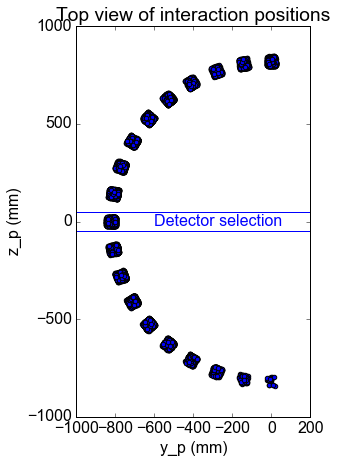

In [7]:
plt.scatter(data['yp_n'], data['zp_n'])
plt.gca().set_aspect(1)
plt.xlabel('y_p (mm)')
plt.ylabel('z_p (mm)')

plt.axhline(50)
plt.axhline(-50)
plt.text(-600,-25, 'Detector selection', color='blue')
plt.title('Top view of interaction positions')
plt.show()


In [8]:
det = (data['zp_n'] > -50) & (data['zp_n'] < 50)
d = data[det]
print('Number of events in this detector: %d (of: %d k)' % (len(data[det]), len(data[det])/1000))

Number of events in this detector: 1737 (of: 1 k)


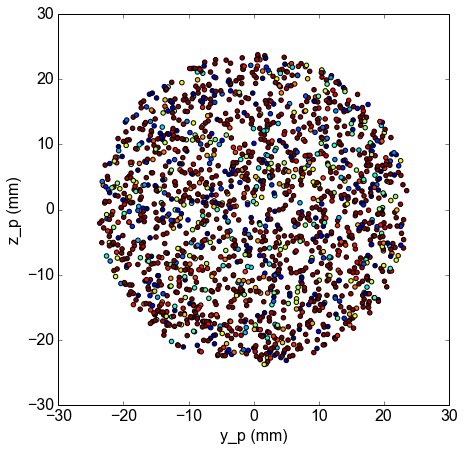

In [9]:
plt.scatter(data[det]['xp_n'], data[det]['zp_n'], c=d['incidentEnergy'])
plt.gca().set_aspect(1)
plt.xlabel('y_p (mm)')
plt.ylabel('z_p (mm)')

# plt.axhline(50)
# plt.axhline(-50)
# plt.text(-600,-25, 'Detector selection', color='blue')

plt.show()


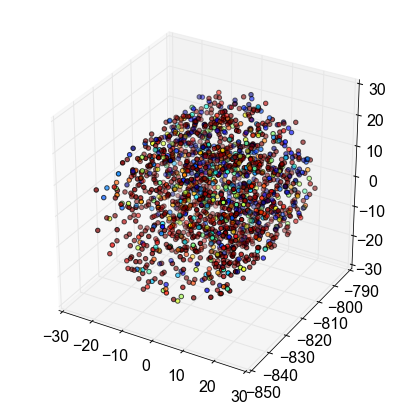

In [10]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[det]['xp_n'], data[det]['yp_n'], data[det]['zp_n'], c=d['incidentEnergy'])
ax.set_aspect(1)
plt.show()

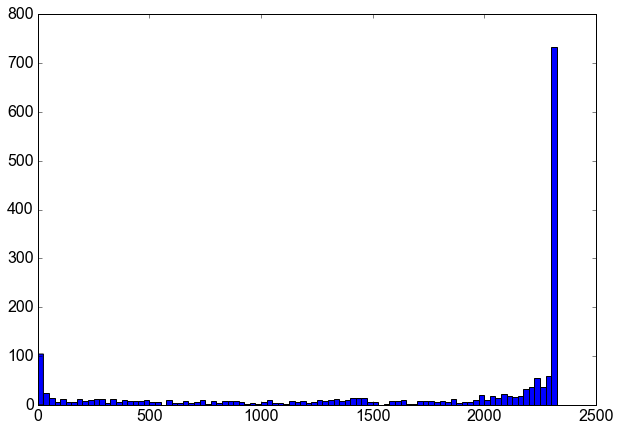

In [11]:
plt.hist(data[det]['incidentEnergy'], range=(0,2500), bins=100)
plt.show()

In [12]:
data['nscatters'][:100]

array([13, 11,  1,  1,  1,  2,  1,  7, 13,  1,  1,  1,  2,  1,  1,  2,  2,
        1,  1,  2,  2,  1,  4,  1,  1,  2,  2,  1,  2,  1,  1,  2,  4,  1,
        7,  2,  1,  1,  4,  1,  3,  2,  2,  1,  1,  2,  1,  1,  1,  4,  1,
        1,  3,  3,  8,  3,  4, 14, 10,  1,  1,  8,  2,  4,  1,  2,  1,  2,
       10,  1,  1,  2,  1,  1,  1,  1,  1, 27,  1,  1,  1,  1,  1,  1,  3,
        1,  1,  1,  3,  1,  4,  3,  1,  9,  1,  1,  7,  1,  2,  2], dtype=int32)

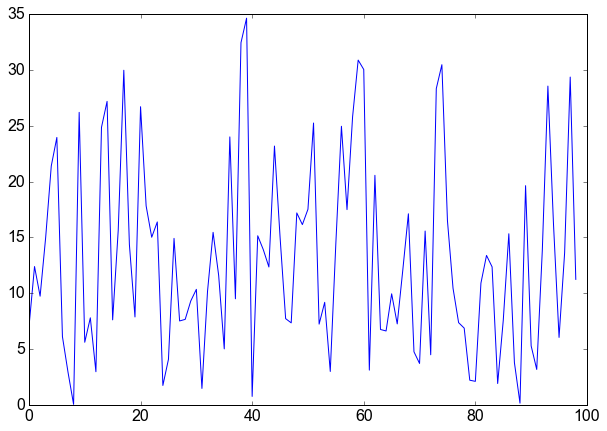

In [13]:
plt.plot(abs(np.diff(data['xp_n'][:100])))

#plt.ylim(1e-300,1e2)

### Now read all

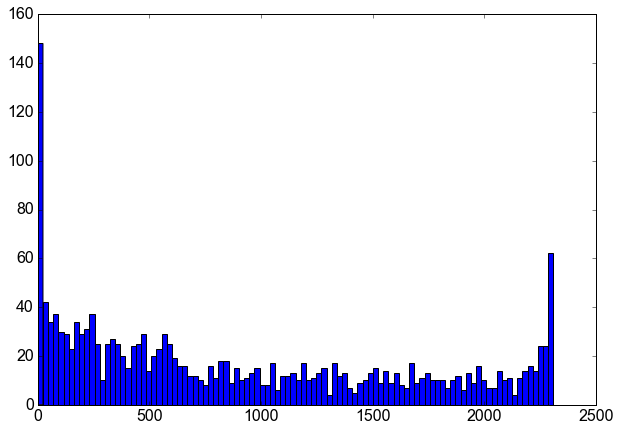

In [14]:
plt.hist(d['depositedEnergy'], bins=100)
plt.show()

In [15]:
d['nscatters']

array([1, 1, 2, ..., 1, 6, 6], dtype=int32)

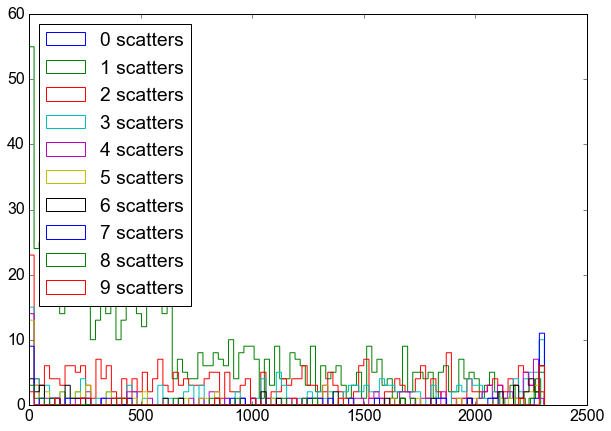

In [16]:
# nscatters=0 means 0 interactions that deposited energy, but they can still lose energy somewhere else!
for i in range(10):
    plt.hist(d[d['nscatters']==i]['depositedEnergy'], histtype='step', bins=100, label='%d scatters' % i)
plt.legend(loc='upper left')

In [17]:
d_sim = {}

for e, fn in zip(simu_energies, simu_fns):
    print('###### Now loading dataset %s at %.2f MeV... ######' % (fn, e))
    f = ROOT.TFile(fn)
    treenames = rn.list_trees(fn)
    assert len(treenames) == 1
    tree = f.Get(treenames[0])
    data = rn.tree2array(tree)
    data = remove_doubles(data, verbose=True)
    det = (data['zp_n'] > -50) & (data['zp_n'] < 50)
    d = data[det]
    print('Number of events in this detector: %d (of: %d k)' % (len(data[det]), len(data[det])/1000))
    d_sim[e] = d
    
    
    
    
    
    print()

###### Now loading dataset ./simu/160812/NE213_231MeV_pro.root at 2.31 MeV... ######
Selected 21965 of 21966 non-identical events (100.0 %)
Number of events in this detector: 1737 (of: 1 k)

###### Now loading dataset ./simu/160812/NE213_261MeV_pro.root at 2.61 MeV... ######
Selected 21563 of 21564 non-identical events (100.0 %)
Number of events in this detector: 1648 (of: 1 k)

###### Now loading dataset ./simu/160812/NE213_1400MeV_pro.root at 14.00 MeV... ######
Selected 13283 of 13284 non-identical events (100.0 %)
Number of events in this detector: 957 (of: 0 k)



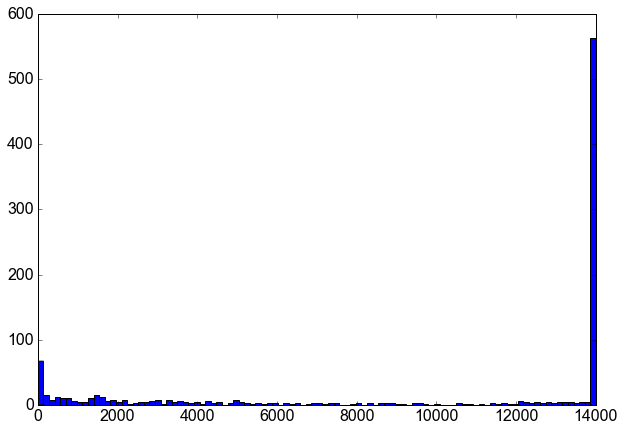

In [18]:
plt.hist(d_sim[14]['incidentEnergy'], bins=100)
plt.show()